# DATA 300: Statistical Machine Learning

# Homework 2

## Name: Selene Nguyen

### Part I 

**1. Write down any 3 time series models that can be used for forecasting.** 

* MA models (Moving Averages)
* ARMA models
* ARIMA models

**2.	What are some real-world applications of time series forecasting? Name two.** 

* Stock market prediction.
* Retail and Sales forecasting.

**3.	What is the difference between a time series and a panel data set?**

* A time series dataset is a dataset with N sample units with only one variable, but this variable is recorded on T different time stamps. (Calls for time series models)
* A panel dataset is a dataset with N sample units and P variables, each variable is further recorded on T different time stamps. (Needs very specialized complex models)

**4.	What is the major difference in how we select training sets in time series machine learning tasks compared to regression/classification tasks?** 

* In time series analysis, we should always use the first K periods t1, ..., tK as the training set, and the rest of periods as holdout set.
* On the other hand, in regression/classification tasks, we just randomly select 80% of the dataset as training set, and use the rest as holdout test set.

**5.	Define the following terms as relates to time series models:**

**a. Stationarity**

* A stationary time series is a time series with no predictable pattern in the long-term.

**b.	Differencing**

* Differencing is a method used to convert a non-stationary time series into one that exhibits stationarity and stabilizes the mean of the time series.

**c.	White noise**

* A white noise series is a series of observations that are independently and identically distributed with a mean of 0 and constant variance.

**d.	Random Walk**

* A random walk series is a series of observations where the current observations equals to the previous observation with a random step up and down.

**6.	Consider the following equation:**

**a.	Interpret the following equation terms in the above equation:**

This model is ARMA(3, 4)
* c is the constant (intercept) term, indicating the baseline level of the time series when all other factors are zero.
* ε_t indicates the error term at time "t", or the difference between the actual observed value and the predicted value by the model.
* ϕ_i is the autocorrelation coefficient of lag i, indicating the influence of the value at x_t-1 on the current value x_t.
* θ_i is the moving average parameters, indicating the influence of the past error terms (ε_t-1) on the current value x_t.
* ε_t-i is the error at time t-i.

**b.	Can you tell from the above equation whether the time series has been differenced? Explain why or why not.**

* The time series has not been differenced since it doesn't contain the difference operator ∆, lagged terms x_(t-1), x_(t-2), etc. or differences in the values x_t - x_(t-1).

**c.	What is the Autoregressive (AR) order in the above equation? How about the Moving Average (MA) order**

* The Autoregressive (AR) order in the above question is 3.
* The Moving Average (MA) order is 4.

**d.	How do you determine the AR and MA order? How do you know how many lags to include in your model?** 

* The AR and MA orders can be determined by examining the equation. "p" indicates the autoregressive (AR) order - the number of lagged values of the dependent variable included in the model. "q" indicates the moving average (MA) order - the number of lagged forecast errors (residuals) inclluded in the model. According to the model, we have an autoregressive order of 3 and a moving average order of 4. 
* To determine the number of lags to include in my model, I analyze the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots to identify the significant lags.

### Part II 

**1.	Read in the data set found here . It has only one time series variable that shows electricity production over time. The data spans 1995 to 2018. You can download it or read it from the course website. Conduct EDA. Is there anything that stands out about the time series variable.**

In [82]:
# Python Version 3.9.13, conda version 23.1.0

In [83]:
# Import packages
import sklearn # v 1.0.2
import numpy as np # v 1.21.5
import pandas as pd # v 1.4.4
import pmdarima as pm # v 2.0.3
import ydata_profiling as pp # v 4.5.1
import matplotlib.pyplot as plt # v 3.5.2
import statsmodels.api as sm # v 0.13.2
import sweetviz as sv # v 2.2.1
import warnings as ww
import statsmodels.tsa.stattools as stattools # v 0.13.2

from statsmodels.tsa.stattools import adfuller # v 0.13.2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.2
from statsmodels.tsa.arima_model import ARIMA # v 0.13.2

from sklearn.metrics import mean_absolute_error # v 1.0.2
from sklearn.metrics import mean_squared_error # v 1.0.2
from sklearn.metrics import mean_absolute_percentage_error # v 1.0.2

In [85]:
ww.filterwarnings("ignore")
%matplotlib inline

In [86]:
# Read in the dataset
electric_df = pd.read_csv("/Users/nmn/Downloads/Electric_Production.csv")

**EDA**


In [87]:
electric_df.columns

Index(['DATE', 'IPG2211A2N'], dtype='object')

In [88]:
electric_df.shape

(397, 2)

In [89]:
electric_df.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [90]:
# Missing values
electric_df.isna().sum() # the total number of missing values (NaN or null) in each column of the dataframe

DATE          0
IPG2211A2N    0
dtype: int64

In [91]:
# First 5 rows of the dataset
electric_df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [92]:
# Last 5 rows of the dataset
electric_df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [93]:
# Summary statistics
electric_df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [94]:
# Pandas Profiling
pp.ProfileReport(electric_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [95]:
# SweetViz
my_report = sv.analyze(electric_df)

                                             |      | [  0%]   00:00 -> (? left)

In [96]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


* We can see the energy production doesn't maintain the same value over the months. 
* The standard deviation is quite high (~15.39), indicating a moderate level of variability.
* The median value (89.7795) is close to the mean (88.85), indicating that the data may exhibit an approximately symmetrical distribution.
* The wide range (min = 55.3151, max = 129.4048) indicates significanct fluctuations in the variable over time.

**2.	Use the KPSS and ADF test to determine whether the is variable stationary. Report the test statistics, the p value, and your conclusions.**

In [97]:
electric_df["DATE"] = pd.to_datetime(electric_df["DATE"]) # for Python to read this column as a date column

In [98]:
# Data type accuraty check
electric_df.dtypes

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [99]:
# Sort the dataframe by the data column for the variables to be arranged in chronological order
electric_df = electric_df.sort_values("DATE") # sort values, with "auto" set to ascending = True

In [100]:
# Function to return the ADF value at the 5% significance level
def adfuller_test(timeseries):
    result = adfuller(timeseries) # returns adf (test statistic), p-value, usedlag (number of lags used), and nobs (number of observations used for the ADF regression and calculation of the critical values)
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    for value, label in zip(result, labels):
        # Iterating through the 'result' and 'labels' lists, pairing each value from 'result' with its corresponding label.
        print(label + ' : ' + str(value))
        
        if result[1] <= 0.05:
            # Checking if we have a p-value <= 0.05, meaning that we have enough evidence to reject the null hypothesis, indicating that the data is stationary.
            print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary.")
        else:
            print("Weak evidence against the null hypothesis (Ho). Data is non-stationary.")

In [101]:
# Loop through all the columns in the dataset; check if each variable is stationary or not
for i in electric_df.columns:
    print(i), adfuller_test(electric_df[i])
    print()

DATE
ADF Test Statistic : -0.14017905755825988
Weak evidence against the null hypothesis (Ho). Data is non-stationary.
p-value : 0.9452865588327521
Weak evidence against the null hypothesis (Ho). Data is non-stationary.
# Lags Used : 12
Weak evidence against the null hypothesis (Ho). Data is non-stationary.
# Observations : 384
Weak evidence against the null hypothesis (Ho). Data is non-stationary.

IPG2211A2N
ADF Test Statistic : -2.2569903500472432
Weak evidence against the null hypothesis (Ho). Data is non-stationary.
p-value : 0.18621469116586814
Weak evidence against the null hypothesis (Ho). Data is non-stationary.
# Lags Used : 15
Weak evidence against the null hypothesis (Ho). Data is non-stationary.
# Observations : 381
Weak evidence against the null hypothesis (Ho). Data is non-stationary.



In [102]:
# Check for stationarity using the KPSS test
for i in electric_df.columns:
    print(i)
    print()
    print(stattools.kpss(electric_df[i], regression='ct')) # returns kpss_stat (the KPSS test statistic), p-value, lags (the truncation lag parameter), and crit (the critical values at 10%, 5%, 2.5%, and 1%)
    # 'ct': The data is stationary around a trend
    print()

DATE

(0.01715323608505754, 0.1, 7, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

IPG2211A2N

(0.5051030832418347, 0.01, 16, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})



* The p-value (0.9453) is greater than the significance level 0.05, indicating weak evidence against the null hypothesis. So the "DATE" variable is likely non-stationary, based on the Augmented Dickey-Fuller (ADF) test.
* The p-value (0.1862) is greater than the significance level 0.05, indicating weak evidence against the null hypothesis. So the "IPG2211A2N" variable is likely non-stationary, based on the ADF test.
* For these reasons, we need to apply differencing to our model to convert a non-stationary time series into one that exhibits stationarity and stabilizes the mean of the time series.

**3.	Plot the variable and label your graph appropriately. Plot the variable after differencing it once. Plot the variable after differencing it twice. Describe the three graphs**

In [103]:
# Remove the date column since we cannot plot it
electric_no_date = electric_df.drop(columns ='DATE')

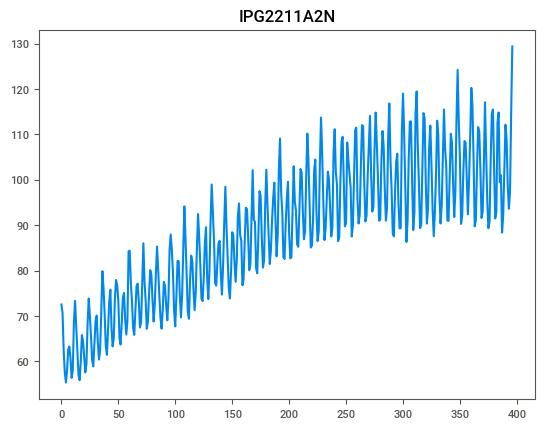

In [104]:
# Plot raw variable
for i, col in enumerate(electric_no_date.columns): # iterate over elements of an iterable
    electric_no_date[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

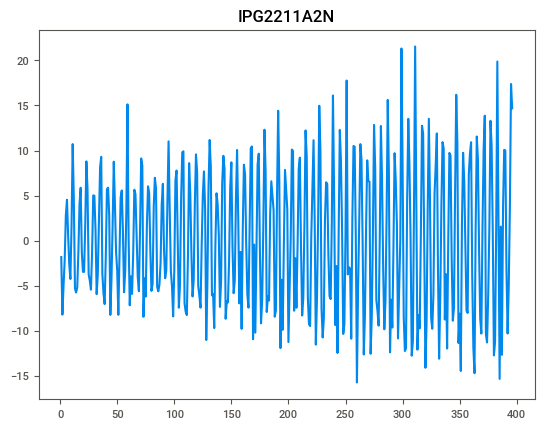

In [105]:
# Plot once differenced variable
for i, col in enumerate(electric_no_date.columns):
    electric_no_date[col].diff().plot(fig=plt.figure(i))
    plt.title(col)

plt.show() # electric_no_date[col].diff()

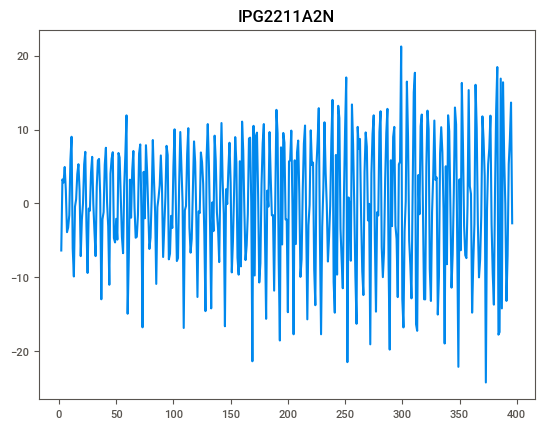

In [106]:
# Plot twice differenced variable
for i, col in enumerate(electric_no_date.columns):
    electric_no_date[col].diff().diff().plot(fig=plt.figure(i))
    plt.title(col)

plt.show() # electric_no_date[col].diff().diff()

After differencing the variable, the data becomes more stationary. The more we difference a variable, the more stationary it becomes. However, the once-differenced variable and twice-differenced variable are not significantly different from each other in this instance.

**4.	Plot the PACF and ACF graphs for the variables. Determine the ARMA order**

In [107]:
# Function to create and display both the Autocorrelation Function (ACF) plot and the Partial Autocorrelation Function (PACF) plot for a given time series dataset
def acf_pacf (series)-> plt.plot:
    return plot_acf(series), plot_pacf(series)
# plot_acf: creating the ACF plot
# plot_pacf: showing the autocorrelation of the time series at different lags (time lags)

DATE

IPG2211A2N



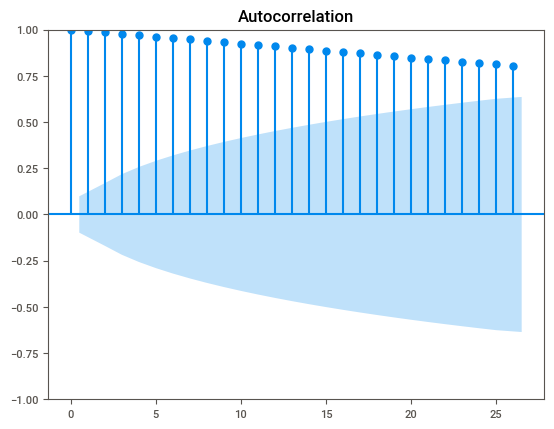

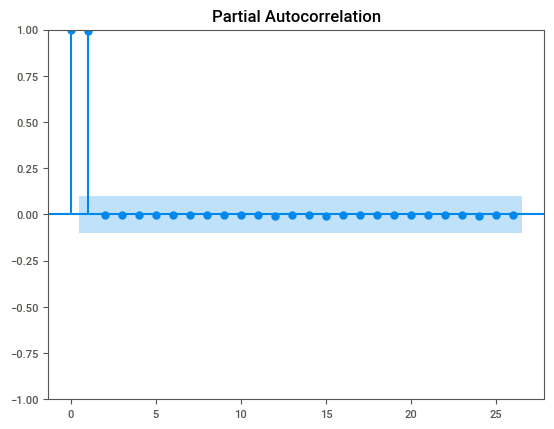

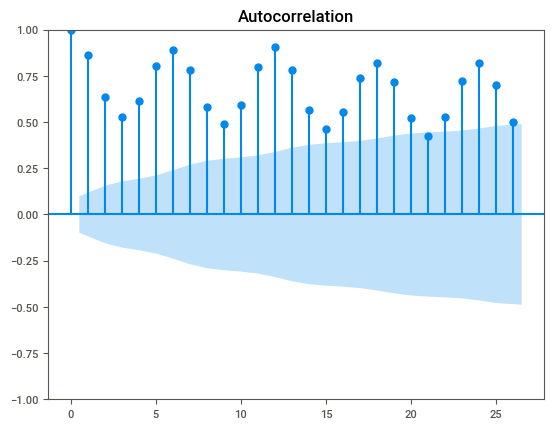

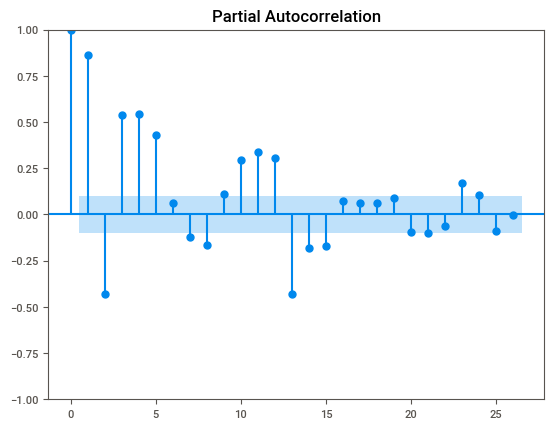

In [108]:
# Plot the ACF and PACF plots for all the series in the data
for i in electric_df.columns:
    print(i)
    acf_pacf(electric_df[i])
    print()

In [109]:
def arimamodel(timeseries):
    # auto_arima: automatically determine the best ARIMA model for the given timeseries
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, # Specify the range for the number of autoregressive (p) 
                              start_q=1, # Specify the moving average (q) terms to consider during the model selection process
                              test="adf", # Specify the method to use for the differencing test (adf)
                              seasonal=True, # Consider seasonal components in the time series
                              trace=True) # Enables tracing and provides detailed information about the model selection process
    return automodel

In [110]:
columns = ['IPG2211A2N']

In [111]:
for i in columns:
    print(i)
    arimamodel(electric_df[i])
    print()

IPG2211A2N
Performing stepwise search to minimize aic


FloatingPointError: invalid value encountered in reciprocal

**5.	Based on 2 and 4 above, what is your final ARIMA (p, d, q) order?**

* My final ARIMA order is (4,1,2). The variables are non-stationary, so we need to difference the variables.

**6.	Fit your model based on the training set that you determine (70%, 80% or 90% of the data).**

In [112]:
model = sm.tsa.arima.ARIMA(electric_df['IPG2211A2N'].head(int(0.8*len(electric_df))), order=(4, 1, 2))
results = model.fit()

In [113]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  317
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -814.548
Date:                Mon, 02 Oct 2023   AIC                           1643.097
Time:                        03:23:19   BIC                           1669.387
Sample:                             0   HQIC                          1653.600
                                - 317                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7590      0.058     13.008      0.000       0.645       0.873
ar.L2         -1.0418      0.063    -16.433      0.000      -1.166      -0.918
ar.L3          0.0418      0.063      0.658      0.511      -0.083       0.166
ar.L4         -0.2818      0.058     -4.893      0.000      -0.395      -0.169
ma.L1         -0.9251      0.017    -56.029      0.000      -0.957      -0.893
ma.L2          0.9815      0.021     46.164      0.000       0.940       1.023
sigma2         9.8204      0.677     14.511      0.000       8.494      11.147
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                19.19
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**7.	Forecast out of sample for the length of your test set**

int(0.8*len(electric_df)) is the training set, which are the first 80% of data points for the IPG2211A2N. You want the test set to start right after it.

In [114]:
electric_df['IPG2211A2N_forecast']=results.predict(start = int(0.8*len(electric_df))+1, end=len(electric_df) , dynamic=True)

<AxesSubplot:>

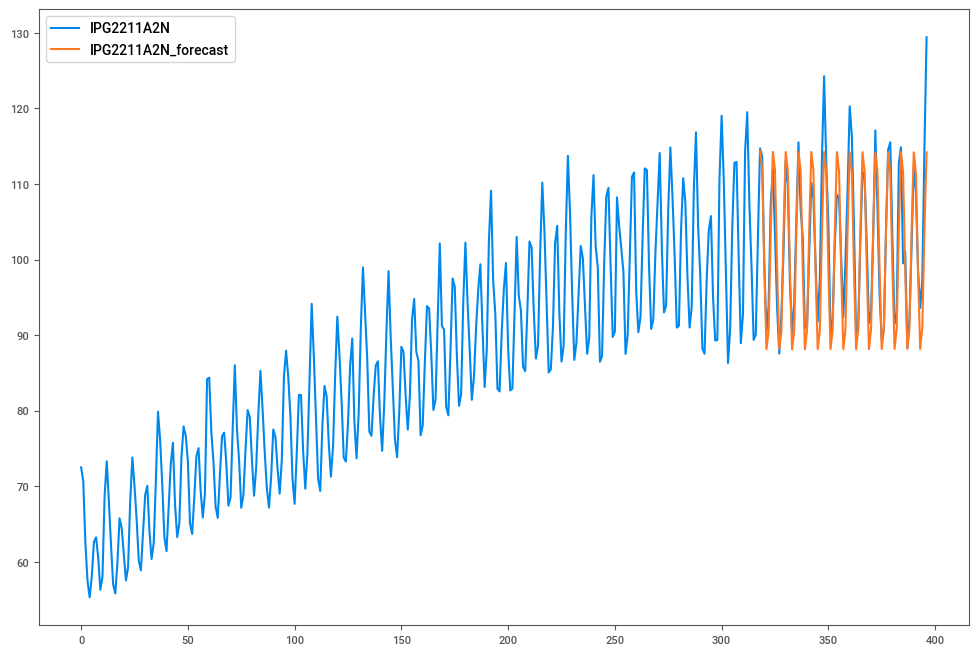

In [115]:
# Plot to visualize what the forecast looks like. It appears to be quite accurate.
electric_df[['IPG2211A2N','IPG2211A2N_forecast']].plot(figsize=(12,8))

**8.	Report Mean Squared Error (MSE) and Mean Absolute Error (MAE)** 

In [116]:
# Mean Squared Error (MSE) 
mean_squared_error(electric_df['IPG2211A2N_forecast'].tail(int(0.2*len(electric_df))),electric_df['IPG2211A2N'].tail(int(0.2*len(electric_df))))
# calculating the mean squared error of the model

20.807359271945437

In [117]:
# Mean Absolute Error (MAE)
mean_absolute_error(electric_df['IPG2211A2N_forecast'].tail(int(0.2*len(electric_df))),electric_df['IPG2211A2N'].tail(int(0.2*len(electric_df))))
# calculating the mean absolute error of the model

3.4543147276966284

**9.	Overall, do you think your model is good? Discuss**

* I think my model is relatively good. My model has effectively predicted energy production, demonstrating a moderate degree of accuracy in its forecasts, as we can see from the forecast plot. My model also have a relatively low MAE, 3.454, meaning that, on average, the predictions exhibit smaller absolute errors, which is a favorable result.